<a href="https://colab.research.google.com/github/mayur3640/ML_Internship_Project/blob/master/ML_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products**


**Data Description :**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Goal :**

To identify the potential customers who have a higher probability of purchasing the loan

# **Step 1** - Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline                
import seaborn as sns
import graphviz

from sklearn import tree             
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
from google.colab import files
upload = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [4]:
dataset = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [5]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Checking datatype, shape, statistical summary and null values 

In [7]:
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

As we can see , Data is in Numeric only
  1. Integer
  2. Float

In [8]:
dataset.shape

(5000, 14)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Attribute Information:**

● **ID:** Customer ID

● **Age:** Customer's age in completed years

● **Experience:** #years of professional experience

● **Income:** Annual income of the customer ($000)

● **ZIP Code:** Home Address ZIP code.

● **Family:** Family size of the customer

● **CCAvg:** Avg. spending on credit cards per month ($000)

● **Education:** Education Level. 

1: Undergrad; 
2: Graduate; 
3:Advanced/Professional



● **Mortgage:** Value of house mortgage if any. ($000)

● **Personal Loan:** Did this customer accept the personal loan offered in the last campaign?

● **Securities Account:** Does the customer have a securities account with the bank?

● **CD Account:** Does the customer have a certificate of deposit (CD) account with the bank?

● **Online:** Does the customer use internet banking facilities?

● **Credit card:** Does the customer use a credit card issued by the bank?


Let's check null values

Null Values : 
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


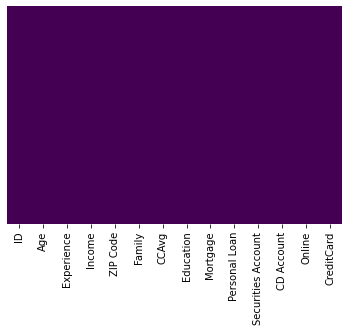

In [10]:
print('Null Values : ')
print(dataset.isnull().sum())
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No null values are present in our dataset , which is a sign of good dataset

In [11]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Here the Experience column having minimum value as -3.0 , which is sign of faulty data. 

As experience cant be negative , we need to clean the experience column

# **Step 2 -**  Cleaning the data

Lets check , Experience column information

In [12]:
(dataset.Experience<0).sum()

52

In [13]:
dataset[dataset.Experience<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

We are having 52 negative values in our Experience column , in which

-1 is occuring 33 times

-2 is occuring 15 times

-3 is occuring 4 times

This kind of data is not suitable for the analysis

So , Lets check if any column is correlated with Experience or not


Correlation between Experience and Age : 0.9942148569683321



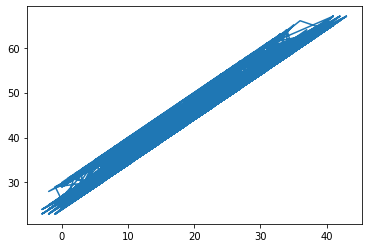

In [14]:
exp = dataset['Experience']
age = dataset['Age']

corr = exp.corr(age)
print('Correlation between Experience and Age :',corr)
print()
plt.plot(exp,age)
plt.show()

As we can see in above plot , Age and Experience are highly correlated with each other having correlation 0.9942148569683321.

So , we can remove any one column from age and experience as both columns will contribute same.
As we know , experience column is having negative values and on other hand age column is having good quality data.

So , I prefer to drop the experience column , as it's having faulty data.

In [15]:
dataset = dataset.drop(['Experience'], axis = 1)

In [16]:
dataset.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


We know that , ID of a person will not help our model to reach on a conclusion.

So , it will be better if we drop ID column.

In [17]:
dataset = dataset.drop(['ID'],axis=1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


Now , all the data is cleaned.


# **Step 3 -** Exploratory data Analysis

In [18]:
print('Unique element in each column : \n')
print(dataset.nunique())

Unique element in each column : 

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


As we can see , ZIP Code is having 467 unique elements and which will not help our model to reach at a conclusion.

So , its better to drop ZIP Code column

In [19]:
dataset = dataset.drop(['ZIP Code'],axis=1)
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


# Number of values in each column

Value count for Family : 
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 



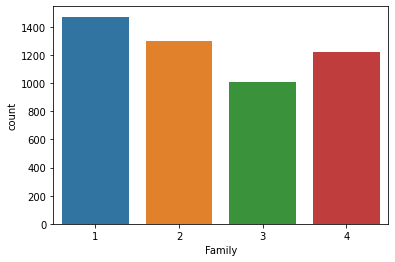

In [20]:
print('Value count for Family : ')
print(dataset.Family.value_counts(),'\n')
sns.countplot(dataset.Family)

From above graph , we can conclude that most of the customers are singles 1472 out off 5000.

Let's check for the Education

Value count for Education : 
1    2096
3    1501
2    1403
Name: Education, dtype: int64 



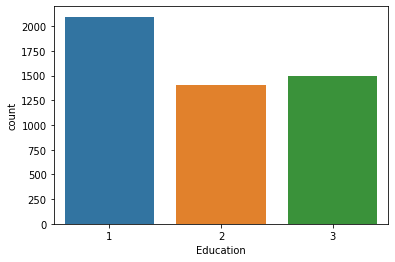

In [21]:
print('Value count for Education : ')
print(dataset.Education.value_counts(),'\n')
sns.countplot(dataset.Education)

From above graph , we can conclude that most of the customers are undergraduate (2096) then Professionals(1501) and last Graduate(1403) respectively .

Let's check how many customers acquired Personal loan

Value count for Personal Loan : 
0    4520
1     480
Name: Personal Loan, dtype: int64 



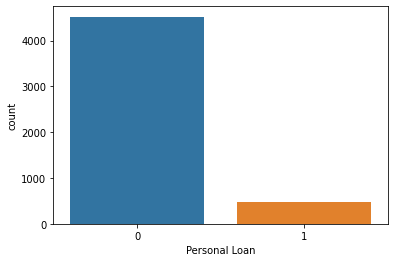

In [22]:
print('Value count for Personal Loan : ')
print(dataset['Personal Loan'].value_counts(),'\n')
sns.countplot(dataset['Personal Loan'])

From above graph , we can conclude that very few customers had taken the loan previous year.

Only 480 peoples out of 5000 had acquired the loan.

Let's check how many customers are having Security Account

Value count for Securities Account : 
0    4478
1     522
Name: Securities Account, dtype: int64 



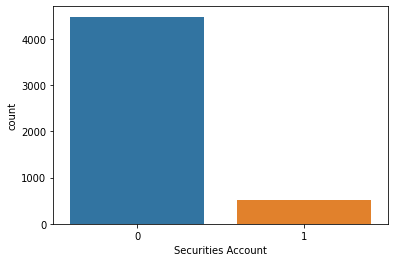

In [23]:
print('Value count for Securities Account : ')
print(dataset['Securities Account'].value_counts(),'\n')
sns.countplot(dataset['Securities Account'])

From above graph , Only 522 customers are having security accounts out of 5000.

Let's check how many customers are having certificate of deposite.

Value count for CD Account	 : 
0    4698
1     302
Name: CD Account, dtype: int64 



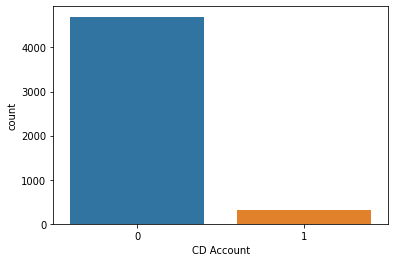

In [24]:
print('Value count for CD Account	 : ')
print(dataset['CD Account'].value_counts(),'\n')
sns.countplot(dataset['CD Account'])

From above graph , Only 522 customers are having Certificate of deposite out of 5000.

Let's check for the customers using Online Banking

Value count for Online	 : 
1    2984
0    2016
Name: Online, dtype: int64 



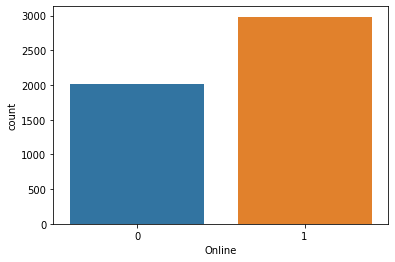

In [25]:
print('Value count for Online	 : ')
print(dataset['Online'].value_counts(),'\n')
sns.countplot(dataset['Online'])

From above graph , most of the customers are using Online banking.

Let's check for the credit card details

Value count for CreditCard	 : 
0    3530
1    1470
Name: CreditCard, dtype: int64 



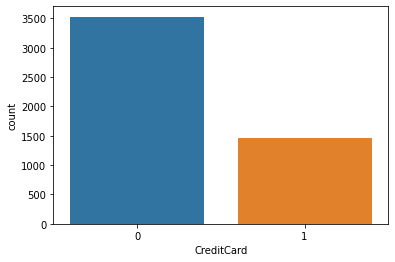

In [26]:
print('Value count for CreditCard	 : ')
print(dataset['CreditCard'].value_counts(),'\n')
sns.countplot(dataset['CreditCard'])

From above graph , few customers are having the credit cards.

In [27]:
print((dataset.Mortgage==0).sum())

3462


From above , 3462 peoples having 0 Mortgage

In [28]:
print((dataset.CCAvg==0).sum())

106


106 customers are having zero credit card spending per month

# Univariate Analysis 

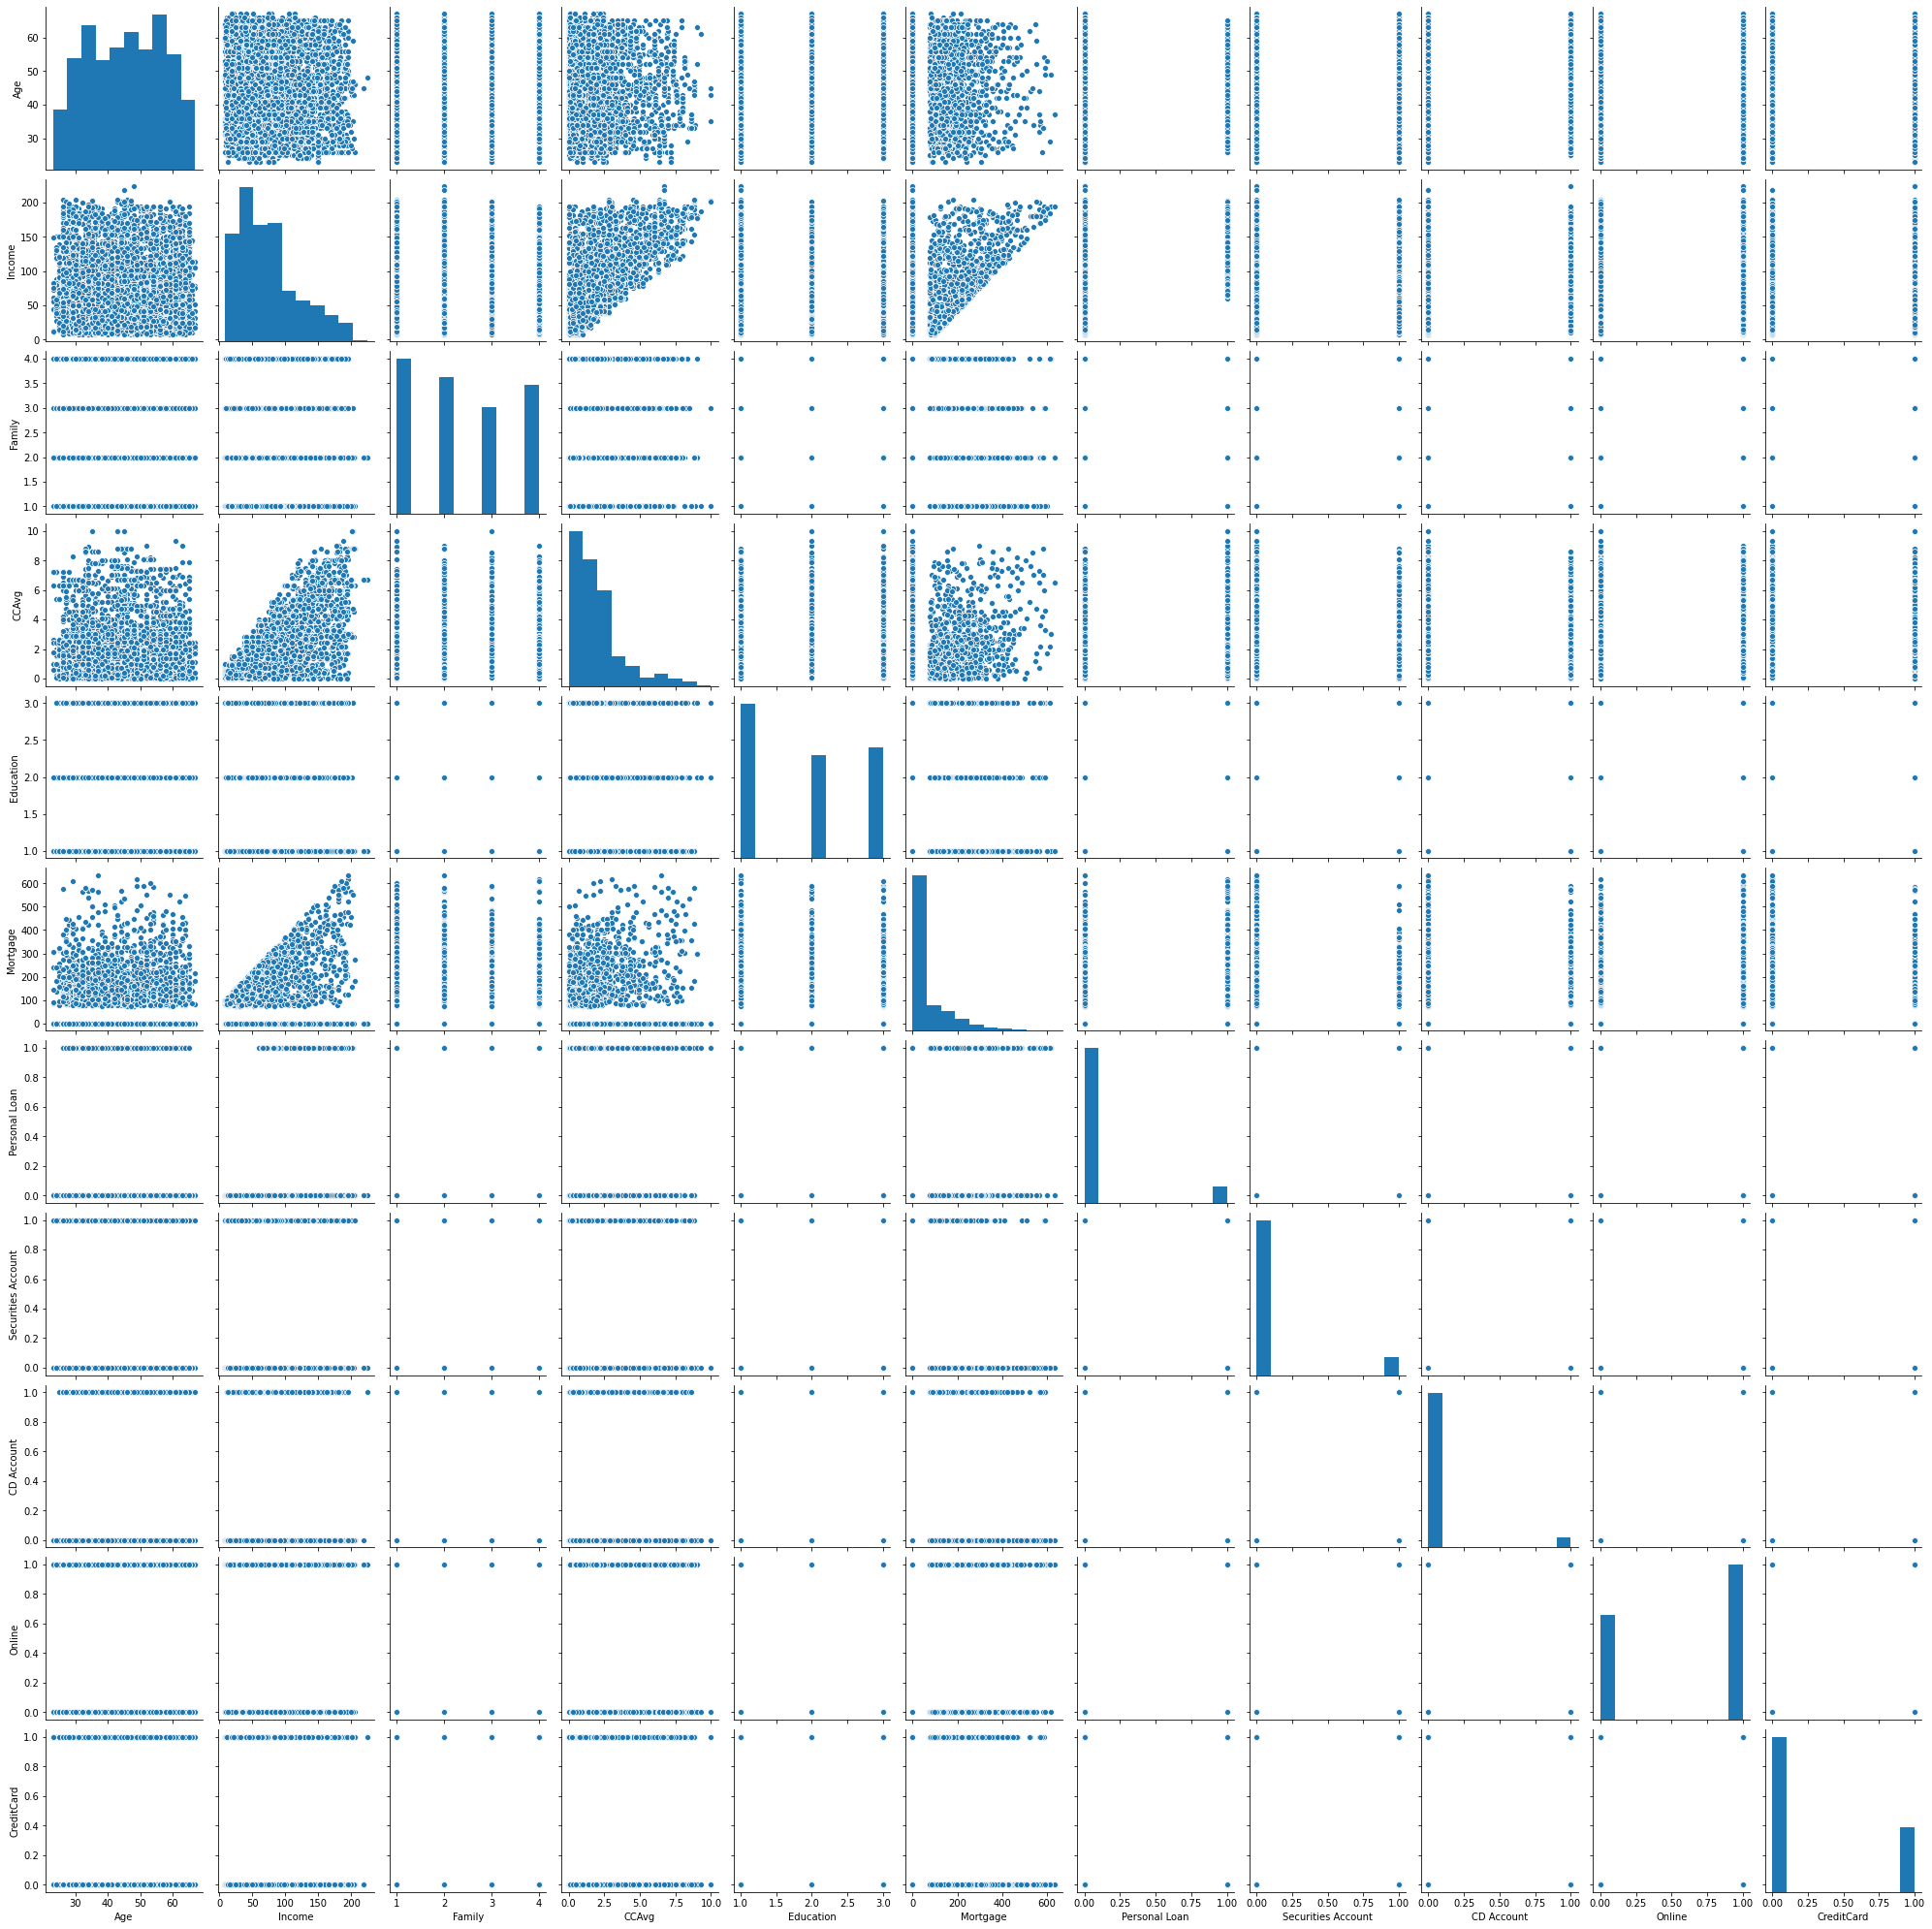

In [29]:
sns.pairplot(dataset)

Let's check for the Age , Income , CCAvg and Mortgage

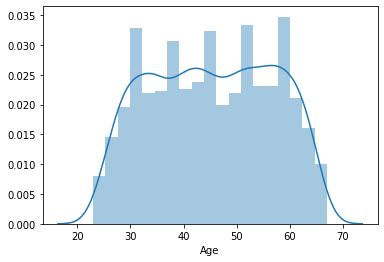

In [30]:
sns.distplot(dataset['Age'])

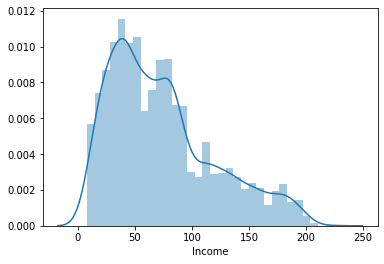

In [31]:
sns.distplot(dataset['Income'])

In [32]:
print(dataset['Income'].value_counts())

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64


As you can see , values are more concentrated in the range (44 to 100)

So because of that we get right skewed distribution which is not a good sign.

We have to convert this into normal distribution in upcoming steps.

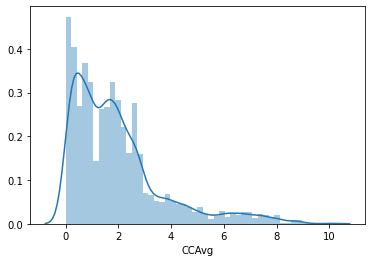

In [33]:
sns.distplot(dataset['CCAvg'])

In [34]:
print(dataset['CCAvg'].value_counts())

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.200000      1
5.333333      1
4.666667      1
8.900000      1
9.300000      1
Name: CCAvg, Length: 108, dtype: int64


As you can see , values are more concentrated in the range (0.3 to 3.0) approximately.

So because of that we get right skewed distribution which is not a good sign.

We have to convert this into normal distribution in upcoming steps.

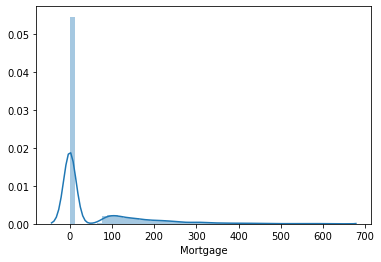

In [35]:
sns.distplot(dataset['Mortgage'])

In [36]:
print(dataset['Mortgage'].value_counts())

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64


As you can see , out of 5000 values , 3462 are having value 0.

So because of that we get right skewed distribution which is not a good sign.

We have to convert this into normal distribution in upcoming steps.

From above plots , 

we can clearly see that 

**Age is having normal distribution** , whereas 

**Income , CCAvg and Mortgage are right skewed distribution**


# Bivariate Analysis

Text(0.5, 1.0, 'Income vs Education')

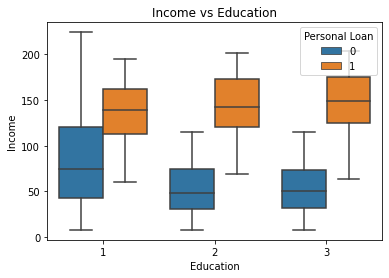

In [37]:
sns.boxplot(x='Education', y='Income' ,hue='Personal Loan' , data=dataset)
plt.title('Income vs Education')

Text(0.5, 1.0, 'Income vs Family')

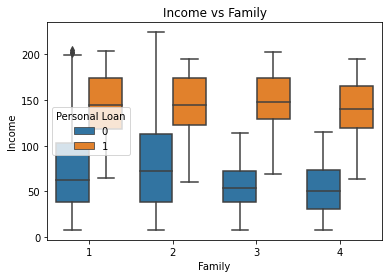

In [38]:
sns.boxplot(x='Family', y='Income' ,hue='Personal Loan' , data=dataset)
plt.title('Income vs Family')

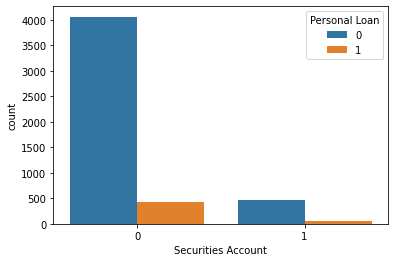

In [39]:
sns.countplot(x='Securities Account',hue='Personal Loan' , data=dataset)

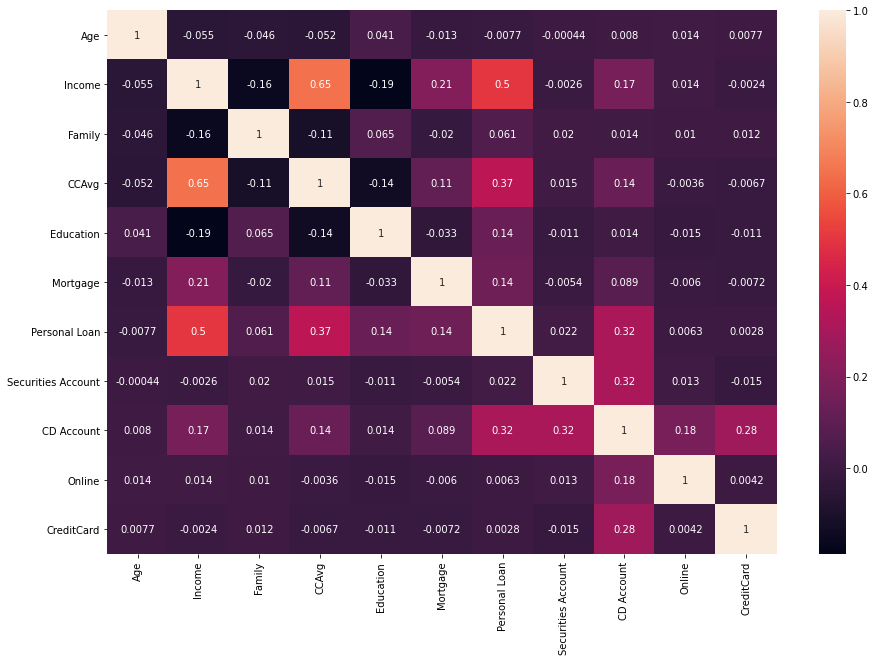

In [40]:
fig , ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr() ,  annot=True)

# **Step 4 -** Applying necessary transformations for the feature variables

As we saw earlier , Income , CCAvg and Income are right skewed.

So , we have to transform them to make it normally distributed.

I am using Power transformation here

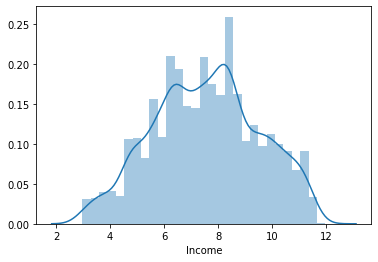

In [41]:
from sklearn.preprocessing import PowerTransformer

# for Income
pt = PowerTransformer(method='yeo-johnson' , standardize=False)
pt.fit(dataset['Income'].values.reshape(-1,1))
dataset.Income = pt.transform(dataset['Income'].values.reshape(-1,1))
sns.distplot(dataset.Income)

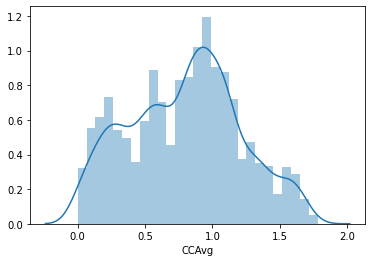

In [42]:
# for CCAvg

pt = PowerTransformer(method='yeo-johnson' , standardize=False)
pt.fit(dataset['CCAvg'].values.reshape(-1,1))
dataset.CCAvg = pt.transform(dataset['CCAvg'].values.reshape(-1,1))
sns.distplot(dataset.CCAvg)

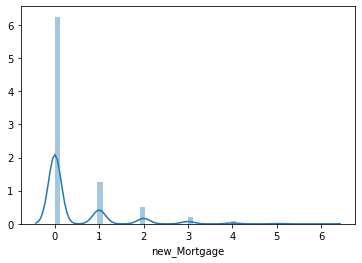

In [43]:
# for Mortgage

dataset['new_Mortgage']=pd.cut(dataset['Mortgage'],
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
sns.distplot(dataset.new_Mortgage)
dataset.drop(['Mortgage'], axis=1 , inplace=True)

Here Income , Mortgage and CCAvg are converted into normal/symmetric distribution which will be more suitable distribution rather than right skewed distribution for prediction process.

# **Step 5 -** Normalization and Splitting the data

Now , we will specify x and y where

**x will represent all features except personal loan**

**y will represent personal loan feature** 

In [44]:
x = dataset.drop(['Personal Loan'],axis=1)
y = dataset['Personal Loan'].values

print('x features : ',x.columns)


x features :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'new_Mortgage'],
      dtype='object')


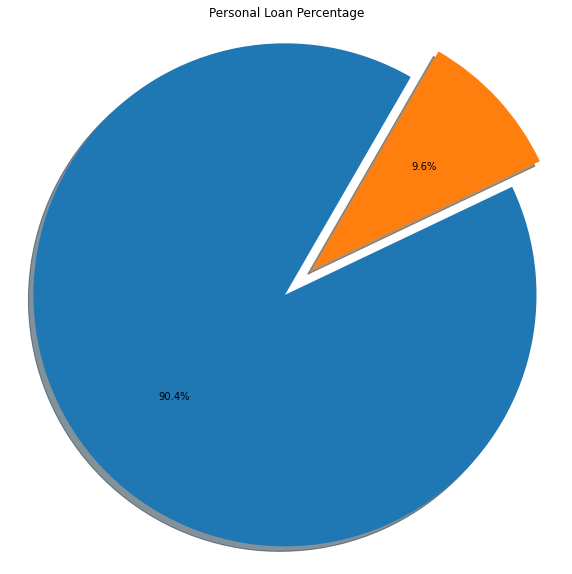

In [45]:
# For Personal Loan

temp = pd.DataFrame(dataset['Personal Loan'].value_counts()).reset_index()
temp.columns = ["Labels",'Personal Loan']
fig1 , ax1 = plt.subplots(figsize=(10,10))
explode=(0,0.15)
ax1.pie(temp['Personal Loan'],explode=explode , autopct='%1.1f%%' , shadow=True , startangle=60)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

As we can see in above pie graph , Only 9.6% of customers acquired loan which is very less amount.

So , for spliting the data we will use **Stratified Sampling technique**

Stratification is the process of dividing members of the population into homogeneous subgroups before sampling. The strata should define a partition of the population.


In [46]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , stratify=y , random_state=0)



In [47]:
from sklearn.preprocessing import StandardScaler
sx = StandardScaler()
sy = StandardScaler()
sx.fit_transform(x_train)
sx.transform(x_test)

array([[-0.97265109,  1.804387  , -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.38356794, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.16034314, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.96255849, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.36542751, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.12557467,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

# **Step 6 -** Training and Testing the models

Accuracy Score on training data : 0.954 

Accuracy Score on test data : 0.948 

Mean Absolute Error :  0.052 

Root Mean Squared Error :  0.22803508501982758 

R2 Score :  0.40081120943952797 

Classfication Report : 
                precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.63      0.70       144

    accuracy                           0.95      1500
   macro avg       0.87      0.81      0.84      1500
weighted avg       0.94      0.95      0.95      1500
 



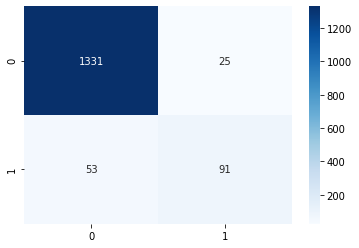

In [48]:
from sklearn.linear_model import LogisticRegression


model1 = LogisticRegression()

model1.fit(x_train , y_train)

model1_train_pred = model1.predict(x_train)
model1_test_pred = model1.predict(x_test)

print("Accuracy Score on training data :",metrics.accuracy_score(y_train,model1_train_pred),'\n')

print("Accuracy Score on test data :",metrics.accuracy_score(y_test,model1_test_pred),'\n')

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,model1_test_pred),'\n')

print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test,model1_test_pred)),'\n')

print('R2 Score : ', metrics.r2_score(y_test,model1_test_pred),'\n')

print('Classfication Report : \n ',classification_report(y_test,model1_test_pred),'\n')

con = confusion_matrix(y_test,model1_test_pred)

sns.heatmap(con,annot=True, fmt='', cmap='Blues')

As we can see in confusion matrics ,

False Negatives are more as compared to False positive

False Negative - means the customer is acquiring the loan but according to our model it is showing that it will not acquire the loan

This should not happen. 

Now let's try Decision Tree

Accuracy Score on training data : 1.0 

Accuracy Score on test data : 0.9833333333333333 

Mean Absolute Error :  0.016666666666666666 

Root Mean Squared Error :  0.12909944487358055 

R2 Score :  0.8079523107177974 

Classfication Report : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.91      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500
 



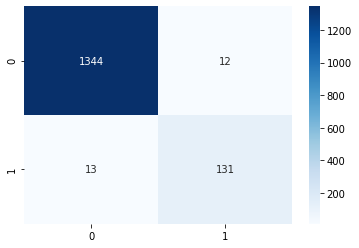

In [49]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(x_train , y_train)

model2_train_pred = model2.predict(x_train)
model2_test_pred = model2.predict(x_test)

print("Accuracy Score on training data :",metrics.accuracy_score(y_train,model2_train_pred),'\n')

print("Accuracy Score on test data :",metrics.accuracy_score(y_test,model2_test_pred),'\n')

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,model2_test_pred),'\n')

print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test,model2_test_pred)),'\n')

print('R2 Score : ', metrics.r2_score(y_test,model2_test_pred),'\n')

print('Classfication Report : \n ',classification_report(y_test,model2_test_pred),'\n')

con = confusion_matrix(y_test,model2_test_pred)

sns.heatmap(con,annot=True, fmt='', cmap='Blues')

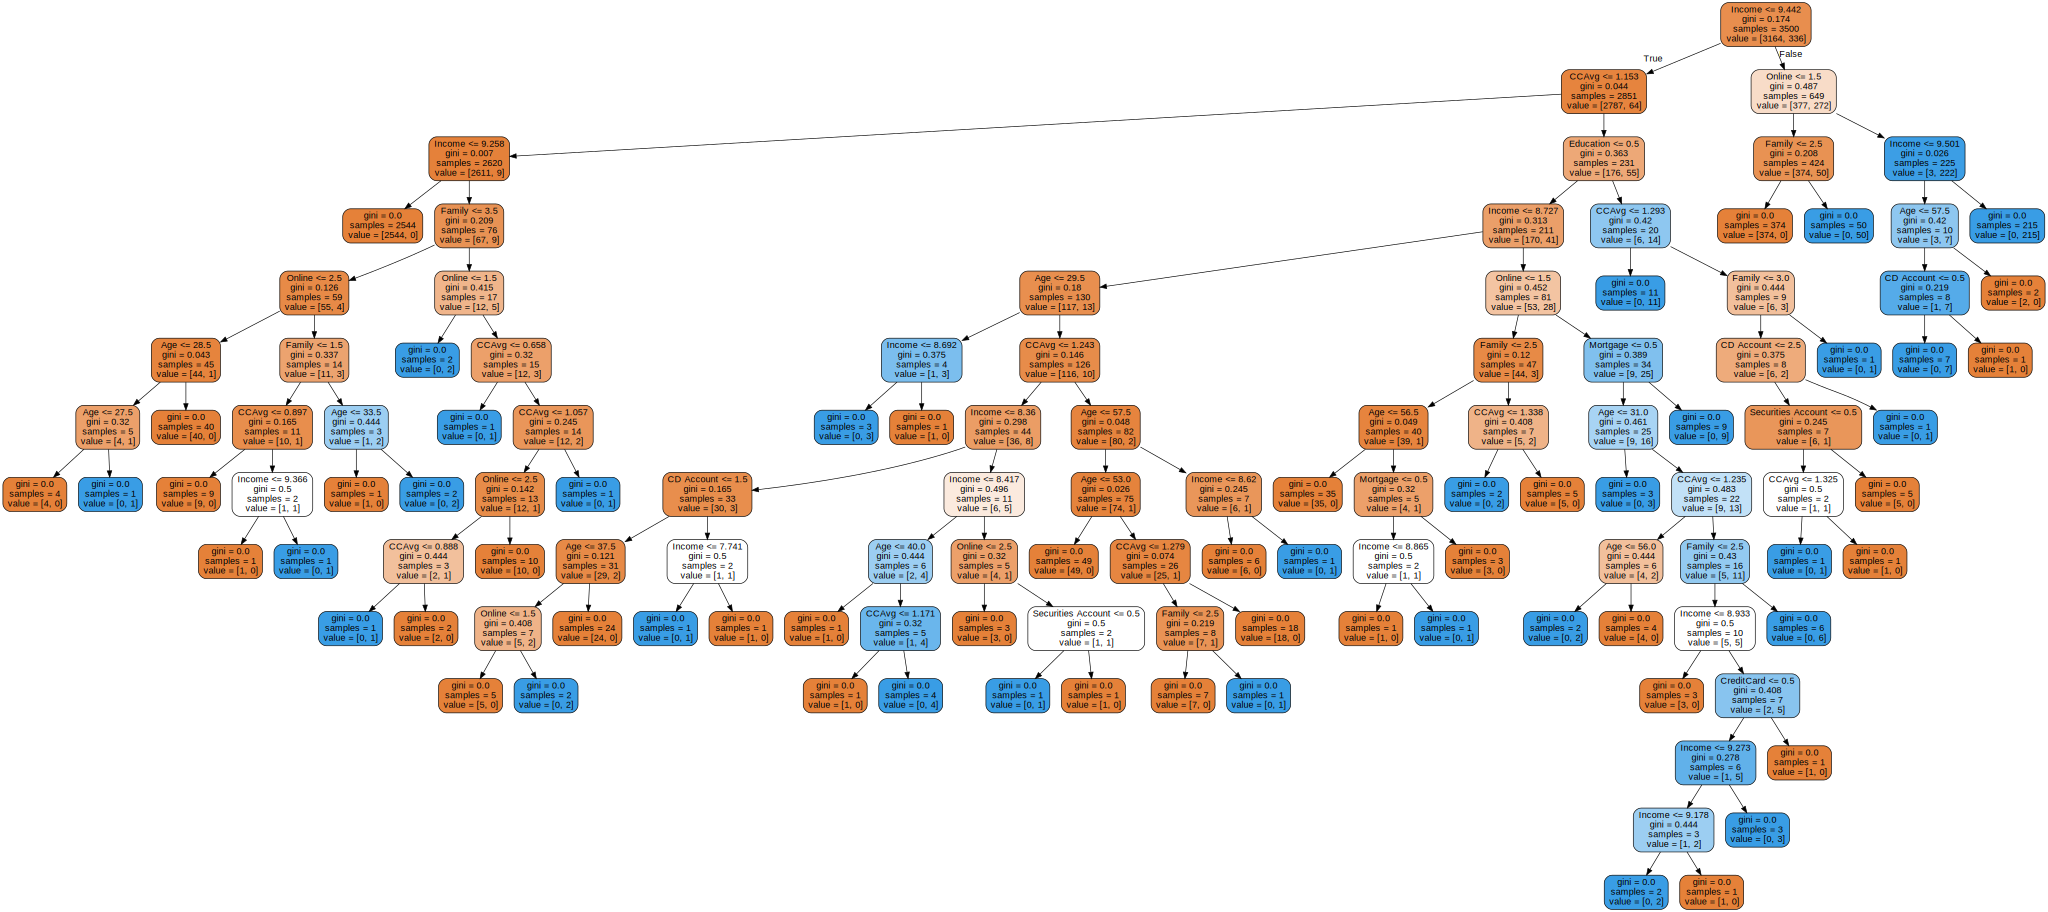

In [50]:
# Decision Tree

dot_data = tree.export_graphviz(model2, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(dot_data)

graph

As we can see in confusion matrics ,

False Negatives are now less as compared to previous model.

As 1 decision tree is giving less False Negative count,

let's try Random forest classifier

Accuracy Score on training data : 1.0 

Accuracy Score on test data : 0.99 

Mean Absolute Error :  0.01 

Root Mean Squared Error :  0.1 

R2 Score :  0.8847713864306784 

Classfication Report : 
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.92      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500
 



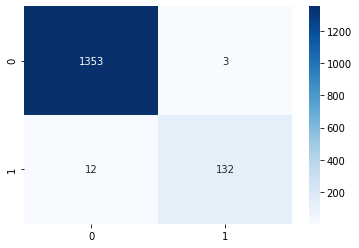

In [54]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()

model3.fit(x_train,y_train)

model3_train_pred = model3.predict(x_train)
model3_test_pred = model3.predict(x_test)

print("Accuracy Score on training data :",metrics.accuracy_score(y_train,model3_train_pred),'\n')

print("Accuracy Score on test data :",metrics.accuracy_score(y_test,model3_test_pred),'\n')

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,model3_test_pred),'\n')

print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test,model3_test_pred)),'\n')

print('R2 Score : ', metrics.r2_score(y_test,model3_test_pred),'\n')

print('Classfication Report : \n ',classification_report(y_test,model3_test_pred),'\n')

con = confusion_matrix(y_test,model3_test_pred)

sns.heatmap(con,annot=True, fmt='', cmap='Blues')

As we can see in confusion matrics ,

False Negatives are now less as compared to previous model.

As Random forest classifier is giving less False Negative count,

# --------------------------------------------------------------------------------------------------------------------


# **Conclusion**




# **1.   Logistic Regression**



> Accuracy Score on training data : 0.954 
>
> Accuracy Score on test data : 0.948
>
> Classfication Report : 

                    precision    recall  f1-score   support

               0       0.96      0.98      0.97      1356
               1       0.78      0.63      0.70       144

        accuracy                           0.95      1500
       macro avg       0.87      0.81      0.84      1500
    weighted avg       0.94      0.95      0.95      1500



> Confusion Matrix:

      [[1331,   25],
       [  53,   91]]








# **2. Decision Tree**



> Accuracy Score on training data : 1.0 
>
> Accuracy Score on test data : 0.982
>
> Classfication Report :

                    precision    recall  f1-score   support

               0       0.99      0.99      0.99      1356
               1       0.91      0.90      0.91       144

        accuracy                           0.98      1500
       macro avg       0.95      0.94      0.95      1500
    weighted avg       0.98      0.98      0.98      1500
 

> Confusion Matrix:

      [[1344,   12],
       [  13,  131]]


# **3. Random Forest Classifier**

> Accuracy Score on training data : 1.0 
>
> Accuracy Score on test data : 0.988 
>
>Classfication Report : 

                    precision    recall  f1-score   support

               0       0.99      1.00      0.99      1356
               1       0.97      0.90      0.94       144

        accuracy                           0.99      1500
       macro avg       0.98      0.95      0.96      1500
    weighted avg       0.99      0.99      0.99      1500


> Confusion Matrix:

      [[1353,    3],
       [  12,  132]]

Now by comparing above 3 Algorithms , I concluded that Random Forest classifier is having most accuracy and less False negative values


> **Accuracy Comparision -**
>
>  Random Forest classifier (0.988) > Decision Tree (0.982) > Logistic Regression (0.948)


> **Confusion Matrix Comparision -**
> 
> We always try to minimize the False Negative values from the confusion matrics
>
> which means that - Customer is ready to purchase the loan , but we are not    considering him.
>
> This should not happen in the real world.
>
> In Logistic regression we are having more number of False Negative values as compared to Decision tree and Random Forest classifier.


>
> **After all the analysis and model prediction , I conclude that Random Forest Classifier works best for the current scenario and has less false negative values.**

